In [27]:
# Altitude vs Pointing Speed MONTY
# Created: 10/12/2022
# Author: Cameron King
# Function Authors: Henri Wessels, Alec Church

# Description:
#
# This is the script that runs a monte-carlo simulation on the model set up in the main script
# It will vary amounts of attitude error to determine resulting efficiency (specifically efficiency associated with attitude error)

# libraries
import math
import numpy
import mpmath
import matplotlib.pyplot as plt
import time

# functions
from ipynb.fs.full.efficiency_funcs import *

<function matplotlib.pyplot.show(close=None, block=None)>

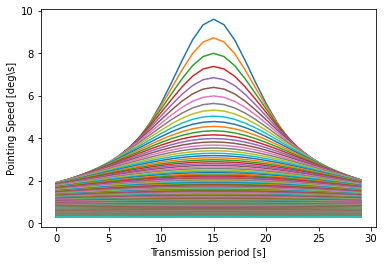

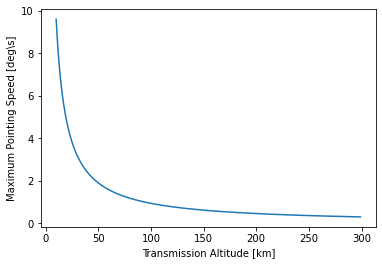

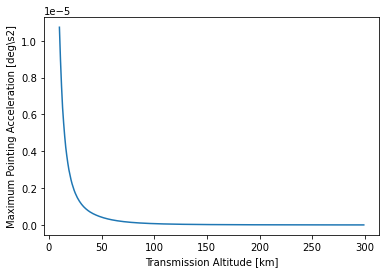

In [29]:
# vary errors by radius of receiver ( increase receiver size, beam position tolerance increases by the same amount )
#
# only does this for one given altitude and transmission time

h = numpy.arange(10000,300000,1000) # ground position error ranges from 0 to 3 TIMES the radius of receiver

t_step = 1;
t_end = 30;

r = 5;
N = t_end/t_step
N = int(N);

# Constants
mu_m = 4.905E12; # Gravitational parameter of the moon, 
r_m = 1737500; # radius of the moon, m


# Functions #
def FOV_func(x,r,h): # determines the angular field of view of receiver, as func of x, r, and h
    FOV = 2*(numpy.arctan((x+r)/h)-numpy.arctan(x/h))
    return FOV

# preallocation
t = numpy.zeros(N);
x = numpy.zeros(N);
theta = numpy.zeros(N);
d = numpy.zeros(N);
dtheta = numpy.zeros((N,len(h)))
dtheta_max = numpy.zeros(len(h))
ddtheta= numpy.zeros((N,len(h)))
ddtheta_max= numpy.zeros(len(h))

# loopin

for j in range(0,len(h)):

    # Calculations
    V = math.sqrt(mu_m/(r_m+h[j])); # orbital velocity
    x_max = V*t_end/2; # Maximum transmission ground distance, x(t=0) at start of transmission
    FOV_min = FOV_func(x_max,r,h[j]); # smallest field of view, at maximum distance

    # ideal beam radius: the average radius of receiver over transmission period
    r_min = math.sqrt(x_max**2+h[j]**2)*numpy.tan(FOV_min/2); # minimum radius based on FOV
    r_b = (r + r_min)/2; # average visual radius, ideal beam radius at surface

    # average transmission distance
    d_max = numpy.sqrt(x_max**2+h[j]**2);
    d_ave = (d_max + h[j])/2;



# loopin
    
    for i in range(0,N):
        t[i] = i*t_step;
        x[i] = V*t[i] - x_max;
        theta[i] = mpmath.atan(x[i]/h[j]);
        d[i] = math.sqrt(x[i]**2 + h[j]**2)
                
        dtheta[i,j] = h[j]*V/(h[j]**2+x[i]**2)*180/numpy.pi # pointing speed, degrees/s
        ddtheta[i,j] = -2*h[j]*x[i]*V/((h[j]**2+x[i]**2)**2)
        
    dtheta_max[j] = max(dtheta[:,j]) # maximum pointing speed per transmission altitude
    ddtheta_max[j] = max(ddtheta[:,j]) # max pointing acceleration per transmission altitued
# plottin

plt.figure()
for i in range(0,len(dtheta[0,:])):
    plt.plot(t, dtheta[:,i])
plt.xlabel('Transmission period [s]')
plt.ylabel('Pointing Speed [deg\s]')
plt.show

plt.figure()
plt.plot(h/1000,dtheta_max)
plt.xlabel('Transmission Altitude [km]')
plt.ylabel('Maximum Pointing Speed [deg\s]')
plt.show

plt.figure()
plt.plot(h/1000,ddtheta_max)
plt.xlabel('Transmission Altitude [km]')
plt.ylabel('Maximum Pointing Acceleration [deg\s2]')
plt.show
